In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from  torch.distributions.multivariate_normal import MultivariateNormal
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = [-2., 1.],[[1,0.5],[0.5,1]]
mu1, sigma1 = [3., 2.], [[1,0.5],[0.5,1]]

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.multivariate_normal.MultivariateNormal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.multivariate_normal.MultivariateNormal(torch.tensor([mu1]),torch.tensor([sigma1]))

In [6]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([ 0.1629, -0.3452]), tensor(-0.5778)]


In [7]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = F.sigmoid(layer(x.view(-1, 2)))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = F.sigmoid(layer(x.view(-1, 2)))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.712903
Ошибка после 1 итераций: 0.269126
Ошибка после 2 итераций: 0.176335
Ошибка после 3 итераций: 0.139188
Ошибка после 4 итераций: 0.117748
Ошибка после 5 итераций: 0.104205
Ошибка после 6 итераций: 0.094004
Ошибка после 7 итераций: 0.086701
Ошибка после 8 итераций: 0.080841
Ошибка после 9 итераций: 0.075704
Ошибка после 10 итераций: 0.072131
Ошибка после 11 итераций: 0.068150
Ошибка после 12 итераций: 0.064865
Ошибка после 13 итераций: 0.062790
Ошибка после 14 итераций: 0.059879
Ошибка после 15 итераций: 0.057740
Ошибка после 16 итераций: 0.056506
Ошибка после 17 итераций: 0.054518
Ошибка после 18 итераций: 0.052793
Ошибка после 19 итераций: 0.051445


In [8]:
import numpy as np
x, y = np.meshgrid( np.linspace(-10, 10, 500),  np.linspace(-10, 10, 500))
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
d0_pdf = stats.multivariate_normal.pdf(pos, mu0, sigma0)
d1_pdf = stats.multivariate_normal.pdf(pos, mu1, sigma1)
x_tensor = torch.tensor(pos, dtype=torch.float)
with torch.no_grad():
    dist = F.sigmoid(layer(x_tensor.view(-1, 2))).numpy()

In [9]:
ratio = d1_pdf / (d1_pdf + d0_pdf)

Text(0.5,1,'ratio')

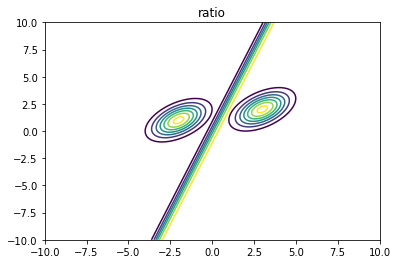

In [14]:
fig, ax = plt.subplots()
d0_ctr = ax.contour(x, y,d0_pdf)
ax.set_title('d0')
d1_ctr  = ax.contour(x, y,d1_pdf)
ax.set_title('d1')
d0_ctr  = ax.contour(x, y,ratio)
ax.set_title('ratio')

In [15]:
print([p.data[0] for p in layer.parameters()])

[tensor([ 1.6870, -0.1144]), tensor(-0.5140)]
